**Module 1 - Statisitcs**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
data_path="Amazon_Instant_Video_5.json"
df = pd.read_json (data_path, lines = True)


In [ ]:
len(df.index)

37126

In [ ]:
df=df.sample(n=25000)

In [ ]:
df.head()

reviewerID        asin  ... unixReviewTime   reviewTime
35118  A127MKME97FF2P  B00I3MPDP4  ...     1393718400   03 2, 2014
5424   A3K24OIL1BDDNT  B003L4S0VI  ...     1371945600  06 23, 2013
25526   AW2NFHGN1ZVDN  B00D1N6OQ2  ...     1374105600  07 18, 2013
20263  A1V0P7DPVCMFE8  B00APE00H4  ...     1391299200   02 2, 2014
12599   AS847FUH1WNON  B0079W7OCY  ...     1363564800  03 18, 2013

[5 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 35118 to 8605
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      25000 non-null  object
 1   asin            25000 non-null  object
 2   reviewerName    24782 non-null  object
 3   helpful         25000 non-null  object
 4   reviewText      25000 non-null  object
 5   overall         25000 non-null  int64 
 6   summary         25000 non-null  object
 7   unixReviewTime  25000 non-null  int64 
 8   reviewTime      25000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.9+ MB


In [ ]:
df["textlength"] = df["reviewText"].apply(len)

In [ ]:
df.describe()

overall  unixReviewTime    textlength
count  25000.000000    2.500000e+04  25000.000000
mean       4.213680    1.376671e+09    513.701160
std        1.115379    3.071983e+07    827.964753
min        1.000000    9.754560e+08      4.000000
25%        4.000000    1.367626e+09    145.000000
50%        5.000000    1.384906e+09    231.000000
75%        5.000000    1.394150e+09    484.000000
max        5.000000    1.406074e+09  13766.000000

In [ ]:
df.head()

reviewerID        asin  ...   reviewTime textlength
35118  A127MKME97FF2P  B00I3MPDP4  ...   03 2, 2014        509
5424   A3K24OIL1BDDNT  B003L4S0VI  ...  06 23, 2013        212
25526   AW2NFHGN1ZVDN  B00D1N6OQ2  ...  07 18, 2013        258
20263  A1V0P7DPVCMFE8  B00APE00H4  ...   02 2, 2014        114
12599   AS847FUH1WNON  B0079W7OCY  ...  03 18, 2013        661

[5 rows x 10 columns]

**Zipf's law**
https://dzone.com/articles/exploring-zipf%E2%80%99s-law-python

In [ ]:
text=df['reviewText'].to_string(index=False)

In [ ]:
text

' It\'s a common fact that a polieman will win ev...\n I\'m a nanny an the 7 month old I watch loves t...\n This show was a slow starter. The end of the f...\n Most awesome show on the planet!  Timothy Olyp...\n This intelligently written and well-acted seri...\n This show is the best show I have seen on netw...\n THE BEST!!!!! I LOVE THIS SHOW!!!!!WHEN I HAD ...\n This show is great.  All the players are funny...\n Clever adult cartoon...pretty funny take on th...\n Daniel is a gentle tiger who appeals to toddle...\n It seemed a bit like tuning in later in the se...\n Marion (Julie Delpy) and Mingus (Chris Rock) l...\n what a story of real life,  probably really ex...\n I chose this rating because I dreamed the peop...\n The research to do this show must have been mo...\n wow, a lot of opinions and a lot of insight in...\n along with seeing some great things people paw...\n I liked it but found it hard to pull for the R...\n life already has this pace this feeling of enn...\n Great!  

In [ ]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for ele in text:  
        if ele in punctuations:  
            text = text.replace(ele, " ") 

In [ ]:
text_words=text.split()

In [ ]:
reuters_words = [w.lower() for w in text_words]
words = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words] 

In [ ]:
counts

[('progra', 2),
 ('cote', 1),
 ('lightly', 1),
 ('laid', 4),
 ('ente', 8),
 ('surprisin', 1),
 ('clothes', 3),
 ('sauce', 1),
 ('woke', 2),
 ('something', 105),
 ('adol', 1),
 ('ablities', 1),
 ('undead', 2),
 ('freaki', 1),
 ('acceptance', 1),
 ('conj', 1),
 ('wacky', 4),
 ('require', 3),
 ('please', 52),
 ('copious', 2),
 ('billed', 1),
 ('fulll', 1),
 ('winchesters', 1),
 ('hours', 6),
 ('over', 161),
 ('somebody', 4),
 ('bangkok', 1),
 ('suspend', 2),
 ('ambiguity', 1),
 ('time', 323),
 ('pros', 2),
 ('picked', 25),
 ('commerci', 3),
 ('specials', 6),
 ('awes', 2),
 ('olivier', 1),
 ('wes', 1),
 ('quaid', 4),
 ('prepared', 4),
 ('significance', 1),
 ('dad', 17),
 ('rome', 12),
 ('englis', 2),
 ('smarter', 1),
 ('incorporation', 1),
 ('11', 16),
 ('trained', 1),
 ('impeccable', 1),
 ('scrolling', 1),
 ('frustratin', 1),
 ('brody', 3),
 ('nowadays', 2),
 ('parody', 7),
 ('compa', 1),
 ('appearin', 1),
 ('storm', 4),
 ('surprising', 14),
 ('ephisode', 1),
 ('swim', 2),
 ('long', 117),

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import scipy.stats as ss
from nltk.corpus import wordnet
amb = [(w, c, len(wordnet.synsets(w))) for (w, c) in counts if len(wordnet.synsets(w)) > 0]
amb_p_rank = ss.rankdata([p for (w, c, p) in amb])
amb_c_rank = ss.rankdata([c for (w, c, p) in amb])
amb_ranked = zip(amb, amb_p_rank, amb_c_rank)

In [ ]:
import numpy,math
numpy.corrcoef(amb_c_rank, [math.log(c) for (w, c, p) in amb])

array([[1.        , 0.91403463],
       [0.91403463, 1.        ]])

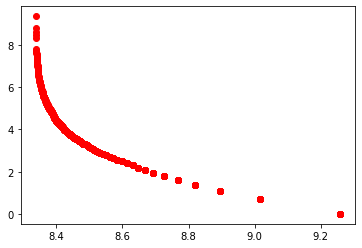

In [ ]:
import matplotlib.pyplot as plt 
import math
rev = [len(counts)-r+1 for r in amb_c_rank]
plt.plot([math.log(c) for c in rev], [math.log(c) for (w, c, p) in amb], 'ro')

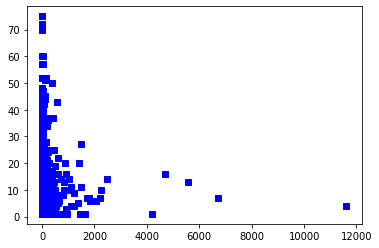

In [ ]:
plt.plot([c for (w,c,p) in amb], [p for (w,c,p) in amb], 'bs')

**Transforming data for further Analysis**

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
def tokenize(text):
    tokenized = word_tokenize(text)
    no_punc = []
    for review in tokenized:
        line = "".join(char for char in review if char not in string.punctuation)
        no_punc.append(line)
    tokens = lemmatize(no_punc)
    return tokens


def lemmatize(tokens):
    lmtzr = WordNetLemmatizer()
    lemma = [lmtzr.lemmatize(t) for t in tokens]
    return lemma

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
reviews = df['reviewText'].apply(lambda x: tokenize(x))

In [ ]:
df["reviewText"]

35118    It's a common fact that a polieman will win ev...
5424     I'm a nanny an the 7 month old I watch loves t...
25526    This show was a slow starter. The end of the f...
20263    Most awesome show on the planet!  Timothy Olyp...
12599    This intelligently written and well-acted seri...
                               ...                        
30969    I just LOVE this show, can't get enough. The c...
1687     The first part of Season 2 got a bit repetitiv...
8677     Wow.  This series is deep, slow, gripping and ...
33658    If you're wondering what the hell my review ha...
8605     Single-Handed is an Irish television series. ....
Name: reviewText, Length: 25000, dtype: object

In [ ]:
df['Sentiment'] = np.where(df['overall'] > 3, "positive", "negative")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 35118 to 8605
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      25000 non-null  object
 1   asin            25000 non-null  object
 2   reviewerName    24782 non-null  object
 3   helpful         25000 non-null  object
 4   reviewText      25000 non-null  object
 5   overall         25000 non-null  int64 
 6   summary         25000 non-null  object
 7   unixReviewTime  25000 non-null  int64 
 8   reviewTime      25000 non-null  object
 9   textlength      25000 non-null  int64 
 10  Sentiment       25000 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.3+ MB


In [ ]:
df.describe()

overall  unixReviewTime    textlength
count  25000.000000    2.500000e+04  25000.000000
mean       4.213680    1.376671e+09    513.701160
std        1.115379    3.071983e+07    827.964753
min        1.000000    9.754560e+08      4.000000
25%        4.000000    1.367626e+09    145.000000
50%        5.000000    1.384906e+09    231.000000
75%        5.000000    1.394150e+09    484.000000
max        5.000000    1.406074e+09  13766.000000

In [ ]:
X = df["reviewText"]
y = df["Sentiment"]

In [ ]:
X

35118    It's a common fact that a polieman will win ev...
5424     I'm a nanny an the 7 month old I watch loves t...
25526    This show was a slow starter. The end of the f...
20263    Most awesome show on the planet!  Timothy Olyp...
12599    This intelligently written and well-acted seri...
                               ...                        
30969    I just LOVE this show, can't get enough. The c...
1687     The first part of Season 2 got a bit repetitiv...
8677     Wow.  This series is deep, slow, gripping and ...
33658    If you're wondering what the hell my review ha...
8605     Single-Handed is an Irish television series. ....
Name: reviewText, Length: 25000, dtype: object

In [ ]:
y

35118    negative
5424     positive
25526    positive
20263    positive
12599    positive
           ...   
30969    positive
1687     positive
8677     positive
33658    negative
8605     positive
Name: Sentiment, Length: 25000, dtype: object

In [ ]:
cv = CountVectorizer(stop_words='english',ngram_range=(1, 1))

In [ ]:
X_vector = cv.fit_transform(X)

# getting the list of words in the corpus
+
+word_list = cv.get_feature_names()

In [ ]:
word_list

['00',
 '000',
 '0031',
 '007',
 '009so',
 '00p',
 '00pm',
 '00s',
 '01',
 '02',
 '02june2013',
 '02pm',
 '03',
 '04',
 '05',
 '06',
 '06am',
 '07',
 '08',
 '09',
 '0m',
 '0new',
 '10',
 '100',
 '1000',
 '1000x',
 '100k',
 '100s',
 '100th',
 '100x',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '101st',
 '102',
 '1023_3',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '1080i',
 '1080p',
 '109',
 '10if',
 '10mins',
 '10pm',
 '10season',
 '10th',
 '10title',
 '10x',
 '10yrs',
 '11',
 '110',
 '112',
 '113',
 '1138',
 '115',
 '115th',
 '116',
 '117',
 '117ad',
 '118',
 '11episodes',
 '11i',
 '11th',
 '11title',
 '12',
 '120',
 '1200',
 '122',
 '126',
 '127',
 '128513',
 '128521',
 '128522',
 '128526',
 '128550',
 '1293',
 '12garrow',
 '12mbit',
 '12or',
 '12pm',
 '12state',
 '12th',
 '12title',
 '13',
 '130',
 '1300',
 '1303',
 '133',
 '13th',
 '13the',
 '13title',
 '14',
 '1400',
 '1408',
 '143',
 '144',
 '145',
 '146',
 '148',
 '1492',
 '14th',
 '15',
 '150',
 '1500',
 '157',
 '15k',
 '

In [ ]:
len(word_list)

45191

In [ ]:
# Getting the top n words in ascending frequencies 
n = 20
ind = np.argsort(X_vector.toarray().sum(axis=0))[-n:]

In [ ]:
top_n_words = [word_list[a] for a in ind]
print(top_n_words)

['don', 'episodes', 'people', 'watching', 'film', 'time', 'episode', 'movie', 'story', 'characters', 'watch', 'love', 'really', '34', 'great', 'just', 'good', 'series', 'like', 'season']


In [ ]:
# Getting the word list with frequencies 
count_list = np.asarray(X_vector.sum(axis=0))[0]
word_with_freq = dict(zip(word_list, count_list))

In [ ]:
len(word_with_freq)

45191

In [ ]:
total=0
for ele in range(0, len(count_list)):
    total = total + count_list[ele]
total

1047542

# Module 2 - Naive Bayes Pipeline


In [ ]:
print(X_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X_vector,y,test_size=0.2)

In [ ]:
# Classifier used Naive Bayes 
nb = MultinomialNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 487  583]
 [ 238 3692]]
              precision    recall  f1-score   support

    negative       0.67      0.46      0.54      1070
    positive       0.86      0.94      0.90      3930

    accuracy                           0.84      5000
   macro avg       0.77      0.70      0.72      5000
weighted avg       0.82      0.84      0.82      5000



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Creating the pipeline 
pipeline = Pipeline([
    ("count_vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("model", MultinomialNB())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
new_pred = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, new_pred))
print(classification_report(y_test, new_pred))

[[   3 1050]
 [   0 3947]]
              precision    recall  f1-score   support

    negative       1.00      0.00      0.01      1053
    positive       0.79      1.00      0.88      3947

    accuracy                           0.79      5000
   macro avg       0.89      0.50      0.44      5000
weighted avg       0.83      0.79      0.70      5000



# Decision Tree Pipeline 

In [ ]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X_vector,y,test_size=0.2)

In [ ]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(X_train, y_train)

predictions_dt = clf_dt.predict(X_test)

print(confusion_matrix(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))

[[ 432  639]
 [ 539 3390]]
              precision    recall  f1-score   support

    negative       0.44      0.40      0.42      1071
    positive       0.84      0.86      0.85      3929

    accuracy                           0.76      5000
   macro avg       0.64      0.63      0.64      5000
weighted avg       0.76      0.76      0.76      5000



In [ ]:
#  Preparing the test-train dataset again 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Creating the pipeline 
pipeline = Pipeline([
    ("count_vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("model", tree.DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
            

In [ ]:
new_pred = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, new_pred))
print(classification_report(y_test, new_pred))

[[ 428  629]
 [ 580 3363]]
              precision    recall  f1-score   support

    negative       0.42      0.40      0.41      1057
    positive       0.84      0.85      0.85      3943

    accuracy                           0.76      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.75      0.76      0.76      5000



# Logistic Regression Pipeline

In [ ]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X_vector,y,test_size=0.2)

In [ ]:
# predicting using the dataset created by CountVectorizer vector model
clf_lr = LogisticRegression()

clf_lr.fit(X_train, y_train)
predictions_lr = clf_lr.predict(X_test)

print(confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[ 585  521]
 [ 255 3639]]
              precision    recall  f1-score   support

    negative       0.70      0.53      0.60      1106
    positive       0.87      0.93      0.90      3894

    accuracy                           0.84      5000
   macro avg       0.79      0.73      0.75      5000
weighted avg       0.84      0.84      0.84      5000



In [ ]:
# Using the TF-IDF model for pre=processing
from sklearn.feature_extraction.text import TfidfTransformer
 

In [ ]:
#  Preparing the test-train dataset again 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Creating the pipeline to use countvectorizer , TF-IDF for pre-processing and logistic regression for classification
pipeline = Pipeline([
    ("count_vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("model", LogisticRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count_vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [ ]:
# running the pipeline on test data 
new_pred = pipeline.predict(X_test)

In [ ]:
# Generating the confusion matrix 
print(confusion_matrix(y_test, new_pred))
print(classification_report(y_test, new_pred))

[[ 471  589]
 [ 132 3808]]
              precision    recall  f1-score   support

    negative       0.78      0.44      0.57      1060
    positive       0.87      0.97      0.91      3940

    accuracy                           0.86      5000
   macro avg       0.82      0.71      0.74      5000
weighted avg       0.85      0.86      0.84      5000



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Topic Modeling** 

In [ ]:
# Use tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf = tfidf_vectorizer.fit_transform(X)

# Use tf features
tf_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
tf = tf_vectorizer.fit_transform(X)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print("Number of total features: {}".format(len(tfidf_feature_names)))

Number of total features: 45359


Nonnegative Matrix Factorization (NMF) and
Latent Dirichlet Allocation (Lda) [link text](https://)

In [ ]:
# Initialize NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=1,
          alpha=.1, l1_ratio=.5)

# Initialize Ida
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [ ]:
num_top_words = 15

def retrieve_top_words(model, feature_names, num_top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic #{}:".format(idx), end='\n')
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]), end='\n\n')
    print()

In [ ]:
from collections import Counter
nmf_tf = nmf.fit(tf)
nmf_ = nmf_tf.transform(tf)
Counter([np.argmax(i) for i in nmf_])

Counter({0: 5139,
         1: 913,
         2: 1621,
         3: 2799,
         4: 111,
         5: 3732,
         6: 1602,
         7: 4489,
         8: 3044,
         9: 1550})

In [ ]:
retrieve_top_words(nmf_tf, tfidf_feature_names, num_top_words)

Topic #0:
show great love shows watch tv characters watching good cast well seasons really every first

Topic #1:
film story films well horror much scenes director great first also see scene time many

Topic #2:
34 bad people little time guys always new doctor girl every beneath watching pompeii elena

Topic #3:
season episodes first seasons new two second still characters three end dvd get final character

Topic #4:
8217 8211 8221 8220 8216 8230 review even much dvd well one folks characters come

Topic #5:
series great well good characters cast also character tv love dvd watch television watching many

Topic #6:
movie good movies really character great story much first watch get would acting plot even

Topic #7:
like really good would people characters see think get story much watch make could way

Topic #8:
one two time even get well new best would life way another man know much

Topic #9:
episode episodes time first dollhouse cartman south park commentary get finn audio fun adventu

LDA

In [ ]:
lda_tf = lda.fit(tf)
lda_ = lda_tf.transform(tf)
Counter([np.argmax(i) for i in lda_])

Counter({0: 4,
         1: 8,
         2: 1444,
         3: 4,
         4: 8,
         5: 18,
         6: 9103,
         7: 1,
         8: 5,
         9: 14405})

In [ ]:
retrieve_top_words(lda_tf, tfidf_feature_names, num_top_words)

Topic #0:
vampire mr ancient werewolf vampires dean jeffrey milo dracula daniel diaries martin dahmer dafoe tambor

Topic #1:
lewis morse mars inspector veronica wood danny tom oxford neal alex chefs michelle elijah equipment

Topic #2:
film story movie two also well one man horror scenes films first director set even

Topic #3:
dollhouse disappoint whedon echo nuclear cylons garner eliza dushku fewer enormous daisy cylon ha ssn

Topic #4:
samurai miike cumberbatch portland sketch fred finishing assassins 200 censored longworth jaa conan naritsugu diversity

Topic #5:
jane archer mother patrick ryan trek miller abby items mike dance richard tim jay hole

Topic #6:
season show series great good love episode characters watch story one episodes well watching seasons

Topic #7:
8217 8220 8221 zombie 8211 zombies 8230 8216 linda troll hugh addiction beatles freda samantha

Topic #8:
roman rome grandson duck phil battle pompeii neil historical empire soldiers gladiator caffrey dynasty romans

TDIDF

NMF

In [ ]:
nmf_tfidf = nmf.fit(tfidf)
nmf_W = nmf_tfidf.transform(tfidf)
Counter([np.argmax(i) for i in nmf_W])

Counter({0: 9088,
         1: 1714,
         2: 2251,
         3: 2285,
         4: 2042,
         5: 1598,
         6: 1381,
         7: 1803,
         8: 1718,
         9: 1120})

In [ ]:
retrieve_top_words(nmf_tfidf, tfidf_feature_names, num_top_words)

Topic #0:
like one really would characters well get time much shows people think see interesting story

Topic #1:
34 reality always character bad real mystery big little guys us american say type go

Topic #2:
season first seasons better second last episodes watched forward two one enjoyed still watching new

Topic #3:
show great funny really watching enjoy tv hope recommend seasons shows awesome entertaining family cast

Topic #4:
series great well recommend acting tv excellent story characters enjoyed highly actors loved cast best

Topic #5:
good story acting line pretty actors characters writing lines interesting plot bad plots action lots

Topic #6:
movie film movies horror great recommend acting ending made action effects slow loved worth better

Topic #7:
love characters kids watching absolutely every wish seasons wonderful actors family favorite amazing lucy hate

Topic #8:
watch fun amazon prime episodes would watched worth kids tv want watching time shows something

Topic #9:


LDA

In [ ]:
lda_tfidf = lda.fit(tfidf)
lda_W = lda_tfidf.transform(tfidf)
Counter([np.argmax(i) for i in lda_W])

Counter({0: 2, 1: 1, 2: 2, 3: 4, 4: 1, 5: 2, 6: 24985, 8: 1, 9: 2})

In [ ]:
retrieve_top_words(lda_tfidf, tfidf_feature_names, num_top_words)

Topic #0:
sewell 10season hyde ingredient tada jekyll insects hoopla travelled watchhannibal mired evaluations sorensen operish readneck

Topic #1:
totaly chumley hillarious yeast allthat grandbaby ament johansen neverland gala tera shondra fricken reallity spiky

Topic #2:
buh taiping harf arigants ack pry tamari vent eshin boing cao medioum wouold politacly hitches

Topic #3:
awsome temptation hester ration 1800s bodice rippers wolfman soso openers nome patronize yuuuuup carrecters dvring

Topic #4:
oneself agile accuracies creepyit mindsgood deathand showsthough barek theatresdeserves trailerwas actin nauseated shockercan linesthe seamlessi

Topic #5:
cheerful todays astronomy arnel beleivable uhura noon 128522 cra shouldnt markets ng attach mingus sulu

Topic #6:
show season series good great like love watch one 34 really characters story see would

Topic #7:
gabba yo bye artie circumstance pkd smokin elmo swanson precursor eveything iam wat decoded delany

Topic #8:
syria himym ne